# Project Statistical Methods for Decision Making: AutomotiveData Analysis

## Problem 1

### Context
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

### Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description
age: The age of the individual in years.
gender: The gender of the individual, categorized as male or female.
profession: The occupation or profession of the individual.
marital_status: The marital status of the individual, such as married &, single
education: The educational qualification of the individual Graduate and Post Graduate
no_of_dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
house_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
salary: The individual's salary or income.
partner_salary: The salary or income of the individual's partner, if applicable.
Total_salary: The total combined salary of the individual and their partner (if applicable).
price: The price of a product or service.
make: The type of automobile


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [26]:
automobile = pd.read_csv('C:/Users/Nitheesh/Downloads/python/austo_automobile+%282%29+%281%29.csv')
automobile.head() 

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


The code is loading a dataset that appears to contain customer information, including demographic, financial, and interaction-related data. The code then displays the first few rows of this data using the 'head()' function to attain a brief idea about the dataset.

In [27]:
automobile.shape

(1581, 14)

The 'automobile' DataFrame has 1581 rows and 14 columns, indicating data for 1581 customers with 14 features. Knowing the DataFrame's shape is crucial for data analysis and manipulation.

In [98]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.1+ KB


Data types vary across columns, including integers, floats, and objects. Notably, the 'Partner_salary' and 'Gender' column has missing values. This summary is valuable for understanding the dataset's structure and potential data cleaning requirements.

In [29]:
automobile.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

The 'automobile' DataFrame has missing values in two columns: 'Gender' with 53 missing values and 'Partner_salary' with 106 missing values.

In [30]:
automobile.describe(include='all')

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1581.000000,1528,1581,1581,1581,1581.000000,1581,1581,1581,1581.000000,1475.000000,1581.000000,1581.000000,1581
unique,NaN,4,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1199,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,31.922201,NaN,NaN,NaN,NaN,2.457938,NaN,NaN,NaN,60392.220114,20225.559322,79625.996205,35597.722960,NaN
std,8.425978,NaN,NaN,NaN,NaN,0.943483,NaN,NaN,NaN,14674.825044,19573.149277,25545.857768,13633.636545,NaN
min,22.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,29.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,59500.000000,25600.000000,78000.000000,31000.000000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,71800.000000,38300.000000,95900.000000,47000.000000,NaN


The information from the 'automobile' dataset can be explained more simply:

Age: Customers' ages vary from 22 to 54 years, with an average age of around 32 years.

Gender: Most customers are men (about 1199 out of 1528), so there are more men in the data.

Profession: Many customers have jobs, with "Salaried" being the most common (896 people).

Marital Status: A lot of customers are married (about 1443 out of 1581).

Education: Many customers have a "Post Graduate" education (985 people).

Dependents: On average, customers support about 2.46 dependents.

Personal Loan: About 792 customers have personal loans.

House Loan: Around 1054 customers have housing loans.

Partner Working: Most customers (868 out of 1581) have partners who work.

Salary: The average salary is about 60,392, ranging from 30,000 to 99,300.

Partner Salary: Some information is missing in this column.

Total Salary: The average combined income of customers and their partners is roughly 79,626.

Price: Product prices range from 30,000 to 70,000, with an average of about 35,598.

Make: "Sedan" is the most common type of automobile (702 times).

Inference: The data gives insights into customer ages, jobs, relationships, and more. Austo Motor Company can use this information to improve its marketing. It's important to fill in the missing data in the 'Partner Salary' column for a complete analysis.


#### Treating the missing values

To fill missing values in the 'Gender' column of the 'automobile' dataset with the string "Unknown."

In [31]:
automobile['Gender'].fillna("Unknown", inplace=True)

In [32]:
automobile['Gender'].unique()

array(['Male', 'Femal', 'Female', 'Unknown', 'Femle'], dtype=object)

To correct data mistakes in the 'Gender' column of the 'automobile' dataset. Specifically, it replaces the values 'Femal' and 'Femle' with 'Female' which was found in the column.

In [33]:
automobile['Gender'] = automobile['Gender'].replace(['Femal', 'Femle'], 'Female')

Calculatiing the 'Partner_salary' by subtracting the 'Salary' from the 'Total_salary' for each entry in the 'automobile' dataset. This calculation is used to impute missing values in the 'Partner_salary' column.

In [34]:
automobile['Partner_salary'] = automobile['Total_salary'] - automobile['Salary']

In [95]:
automobile.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

There are no null (missing) values in any of the columns in your 'automobile' dataset. This is a positive sign, as having a dataset with no missing values can make your data analysis and modeling processes more straightforward and accurate.

### Univariate Analysis

Bar plots of categorical variables from the 'automobile' dataset. It visualizes the distribution of 'Gender,' 'Profession,' 'Marital_status,' 'Education,' 'Personal_loan,' 'House_loan,' 'Partner_working,' and 'Make'. It provides a quick overview of the data's categorical variable distributions.

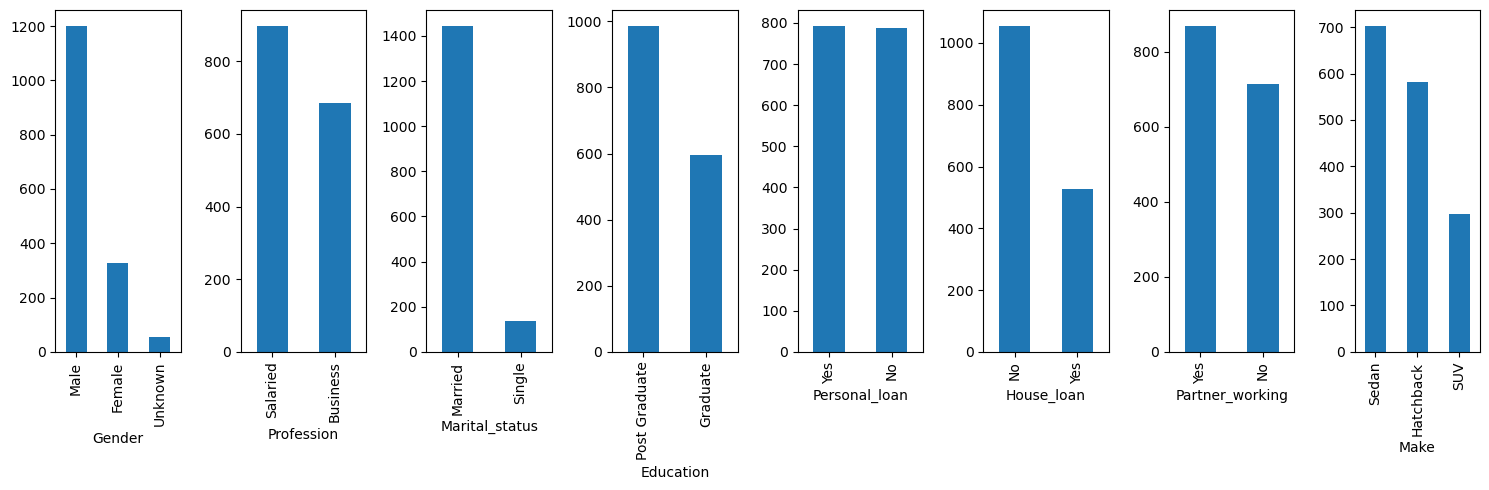

In [36]:
fig, axes = plt.subplots(1, 8, figsize=(15, 5))
plt.xticks(rotation = 45)
automobile['Gender'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Gender')
automobile['Profession'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Profession')
automobile['Marital_status'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('Marital_status')
automobile['Education'].value_counts().plot(kind='bar', ax=axes[3])
axes[3].set_xlabel('Education')
automobile['Personal_loan'].value_counts().plot(kind='bar', ax=axes[4])
axes[4].set_xlabel('Personal_loan')
automobile['House_loan'].value_counts().plot(kind='bar', ax=axes[5])
axes[5].set_xlabel('House_loan')
automobile['Partner_working'].value_counts().plot(kind='bar', ax=axes[6])
axes[6].set_xlabel('Partner_working')
automobile['Make'].value_counts().plot(kind='bar', ax=axes[7])
axes[7].set_xlabel('Make')


plt.tight_layout()
plt.show()

Displaying box plots for numerical variables ('No_of_Dependents,' 'Age,' 'Salary,' 'Partner_salary,' 'Total_salary,' and 'Price') from the 'automobile' dataset. It visualizes the distribution, central tendency, and spread of these numeric features. Each subplot is labeled for clarity and helps in understanding the data's numerical characteristics.

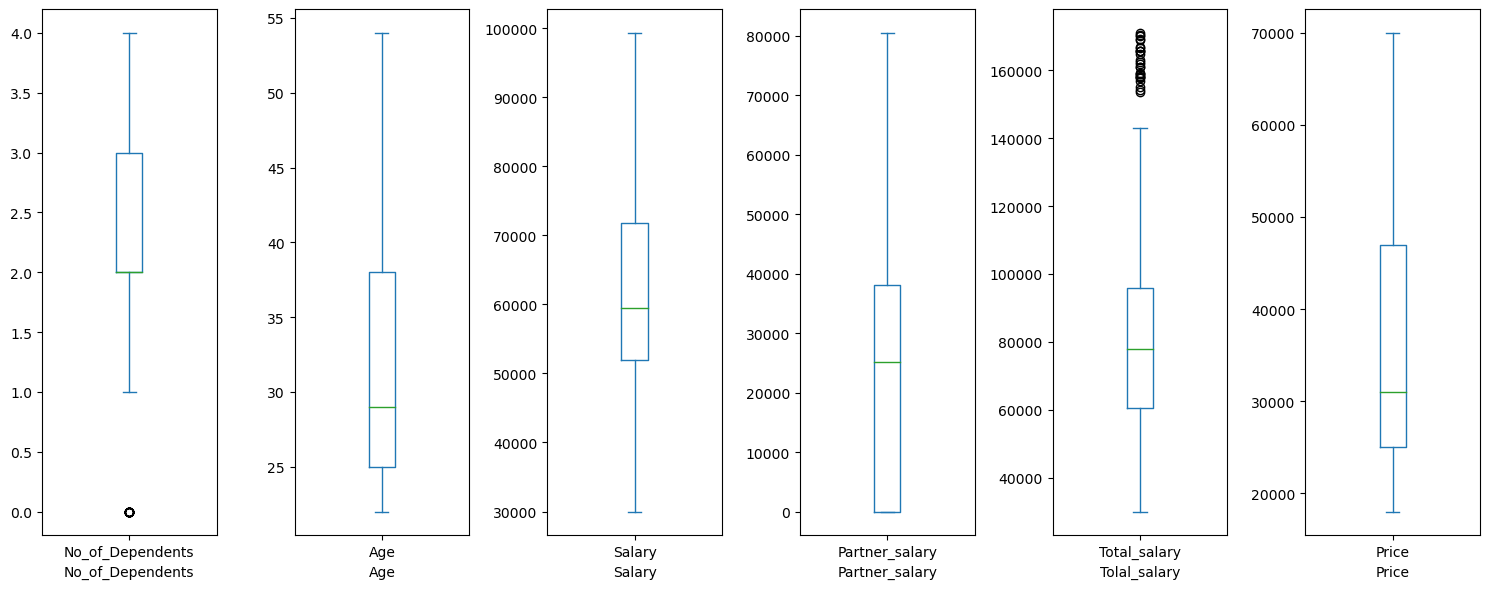

In [96]:
fig, axes = plt.subplots(1, 6, figsize=(15, 6))

automobile['No_of_Dependents'].plot(kind='box', ax=axes[0])
axes[0].set_xlabel('No_of_Dependents')

automobile['Age'].plot(kind='box', ax=axes[1])
axes[1].set_xlabel('Age')

automobile['Salary'].plot(kind='box', ax=axes[2])
axes[2].set_xlabel('Salary')

automobile['Partner_salary'].plot(kind='box', ax=axes[3])
axes[3].set_xlabel('Partner_salary')

automobile['Total_salary'].plot(kind='box', ax=axes[4])
axes[4].set_xlabel('Tolal_salary')

automobile['Price'].plot(kind='box', ax=axes[5])
axes[5].set_xlabel('Price')

plt.tight_layout()
plt.show()

#### The correlation between all numerical variables

C:\Users\Nitheesh\AppData\Local\Temp\ipykernel_3624\2348074659.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = automobile.corr()


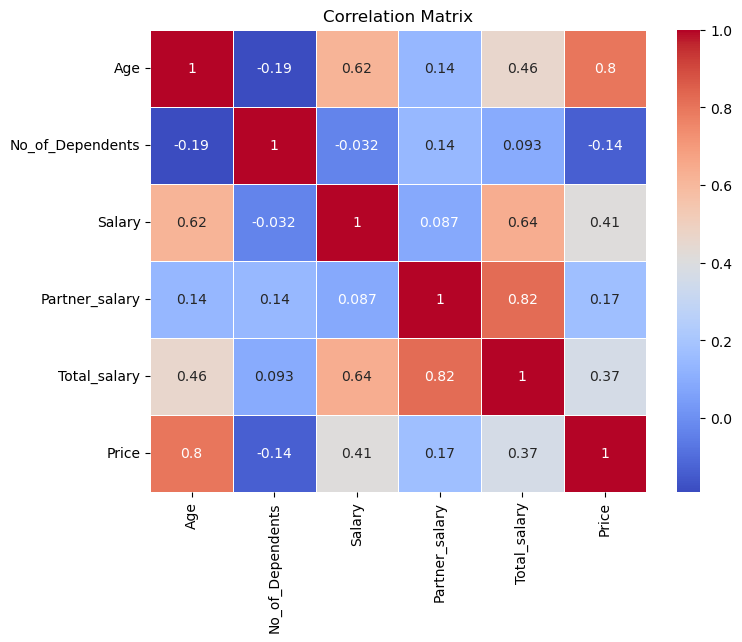

In [46]:
correlation_matrix = automobile.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation analysis reveals strong positive relationships between 'Age' and 'Price' (0.8) and 'Partner_salary' and 'Total_salary' (0.82). However, other numerical variables do not exhibit significant correlations, indicating their independence from each other in the dataset.

Four subplots, each showing a boxplot of numerical variables ('Age,' 'Salary,' 'Price,' 'Total Salary') against the categorical variable 'Make' in the 'automobile' dataset. It enables the visual comparison of how these numerical variables vary across different car makes, aiding data exploration and insights.

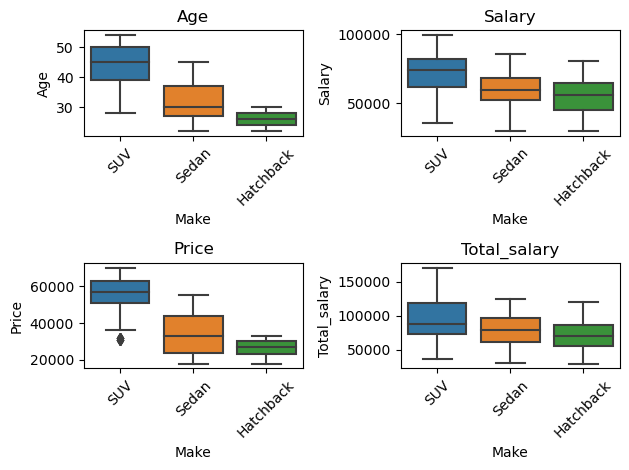

In [97]:
variables_of_interest = ['Age', 'Salary', 'Price','Total_salary']

j=1
for i in variables_of_interest:
    plt.subplot(2,2,j)
    sns.boxplot(x = automobile['Make'], y = automobile.loc[:,i])
    plt.title(i)
    j=j+1
    
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Four subplots, each showing a countplot of Categorical variables ('Gender','Marital_status','Profession','Personal_loan','Education','Partner_working') against the categorical variable 'Make' in the 'automobile' dataset. It enables the visual comparison of how these categorical variables vary across different car makes, aiding data exploration and insights.

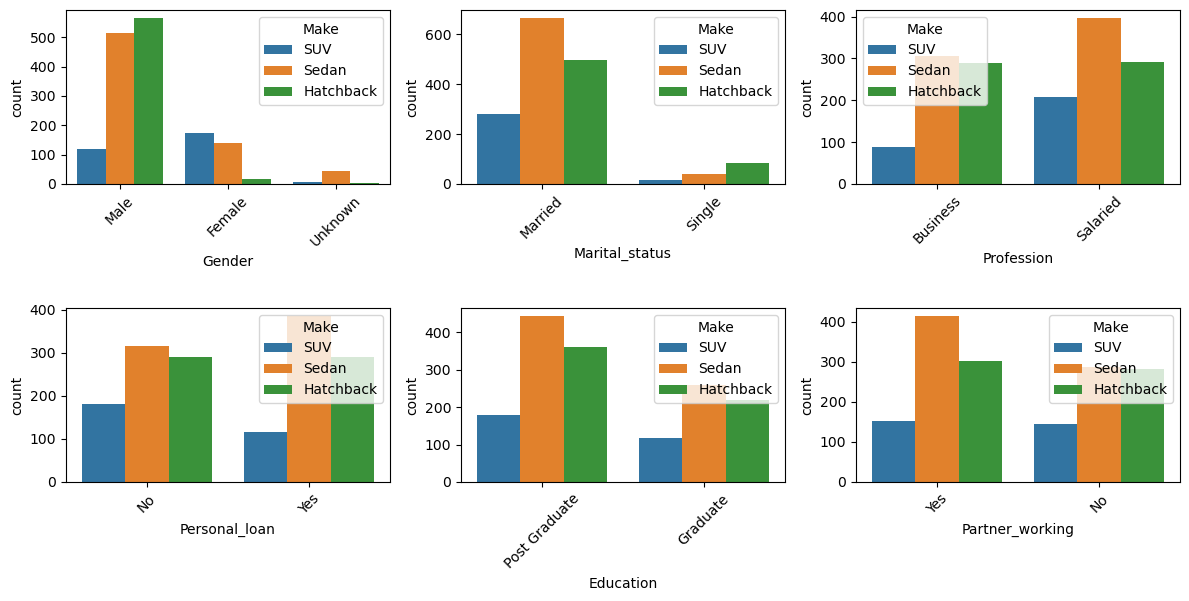

In [82]:
Categorical = ['Gender','Marital_status','Profession','Personal_loan','Education','Partner_working']
j=1
plt.figure(figsize=(12,8))
for i in Categorical:
    plt.subplot(3, 3, j)
    sns.countplot(x=automobile[i], data=automobile, hue=automobile['Make'])
    j=j+1
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

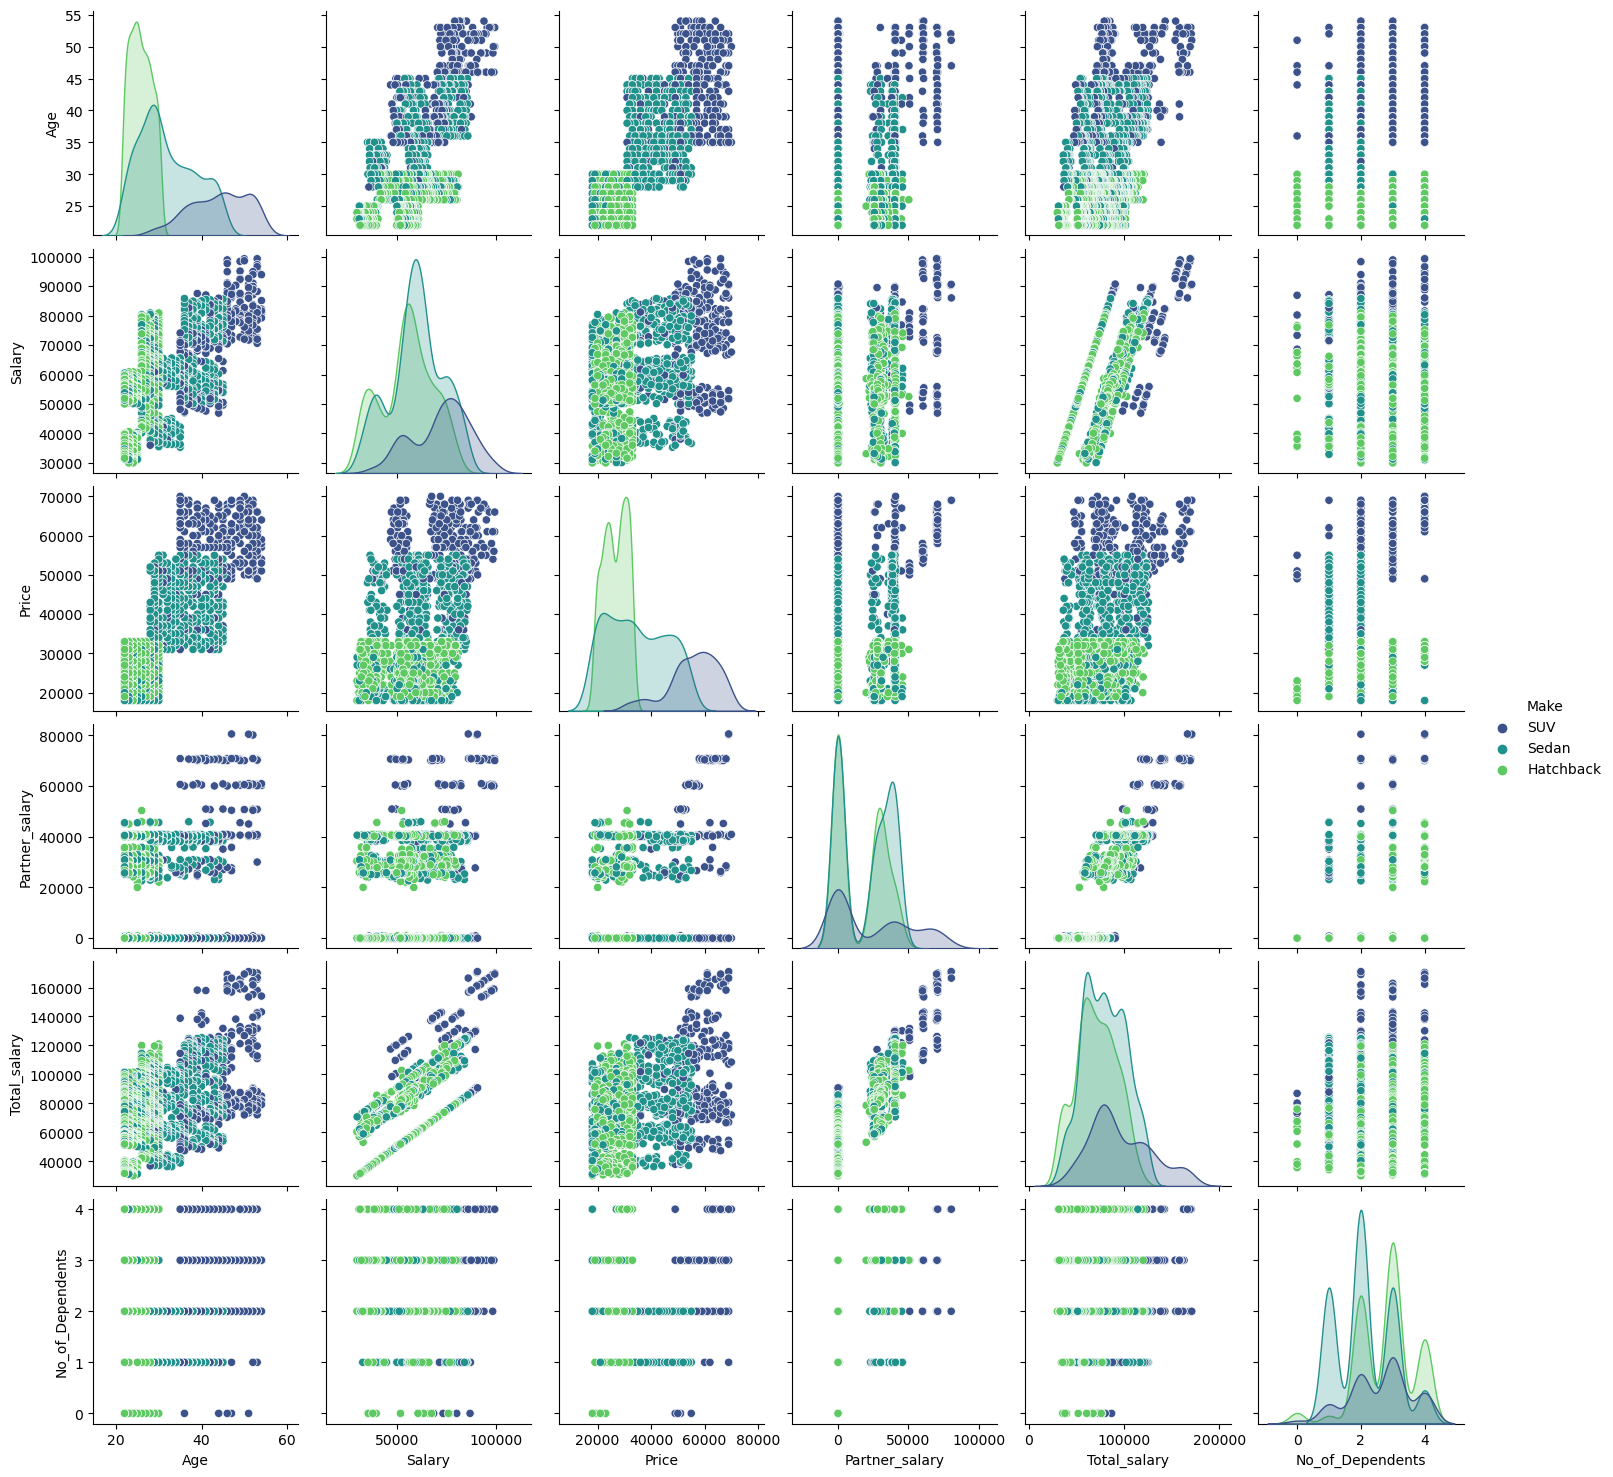

In [56]:
columns = ['Age', 'Salary', 'Price', 'Partner_salary','Total_salary','No_of_Dependents','Make']

sns.pairplot(automobile[columns], hue='Make', palette='viridis')
plt.show()

#### Question 1 : Do men tend to prefer SUVs more compared to women?

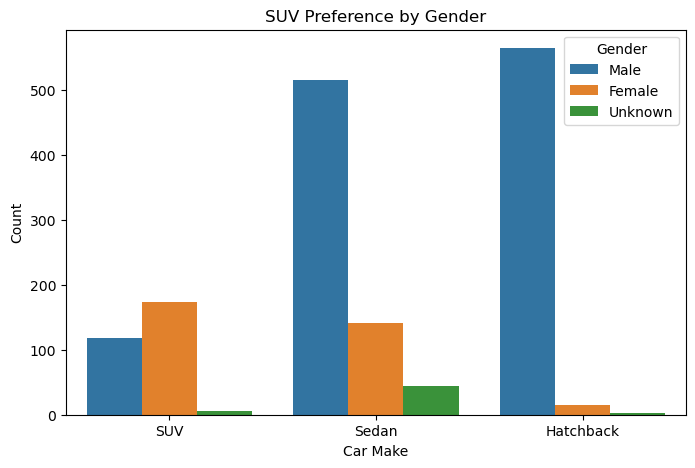

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=automobile, x='Make', hue='Gender')
plt.title('SUV Preference by Gender')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

 From the Countplot above it inferred that women, who may be associated with the 'SUV' category, tend to have higher value compared to men. This observation indicates a gender-based preference for Car Make.

#### Question 2 : What is the likelihood of a salaried person buying a Sedan? 

In [86]:

salaries_and_sedans = automobile[(automobile['Profession'] == 'Salaried') & (automobile['Make'] == 'Sedan')]

total_salaried = len(automobile[automobile['Profession'] == 'Salaried'])

likelihood = len(salaries_and_sedans) / total_salaried

print(f"The likelihood of a salaried person buying a Sedan is: {likelihood:.2%}")

The likelihood of a salaried person buying a Sedan is: 44.20%


Salaried individuals in the dataset have a 44.20% likelihood of purchasing a Sedan, indicating a preference for this car type among this group.

#### Question 3 : What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [94]:
salaried_data = automobile[automobile['Profession'] == 'Salaried']
contingency_table = pd.crosstab(salaried_data['Make'], salaried_data['Gender'], normalize = 'all')
contingency_table_percentage = contingency_table * 100
contingency_table_percentage

Gender,Female,Male,Unknown
Make,,,
Hatchback,1.674107,30.803571,0.111607
SUV,13.169643,9.486607,0.558036
Sedan,10.156250,31.138393,2.901786


In this dataset, Salaried males are more inclined to choose Sedans over SUVs, making them easier targets for Sedan sales.

#### Question 4 : How does the the amount spent on purchasing automobiles vary by gender?

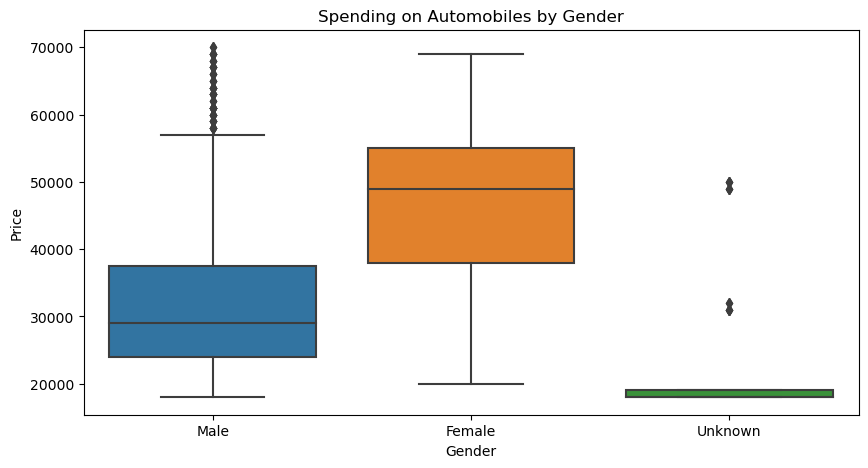

In [55]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=automobile, x='Gender', y='Price')
plt.title('Spending on Automobiles by Gender')
plt.xlabel('Gender')
plt.ylabel('Price')
plt.show()

On average, the amount spent on purchasing automobiles is higher for women compared to men. This implies that, within the dataset, female individuals tend to invest more money in buying cars than their male counterparts.

C:\Users\Nitheesh\AppData\Local\Temp\ipykernel_3624\3344962465.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Price', data=automobile, ci=None)


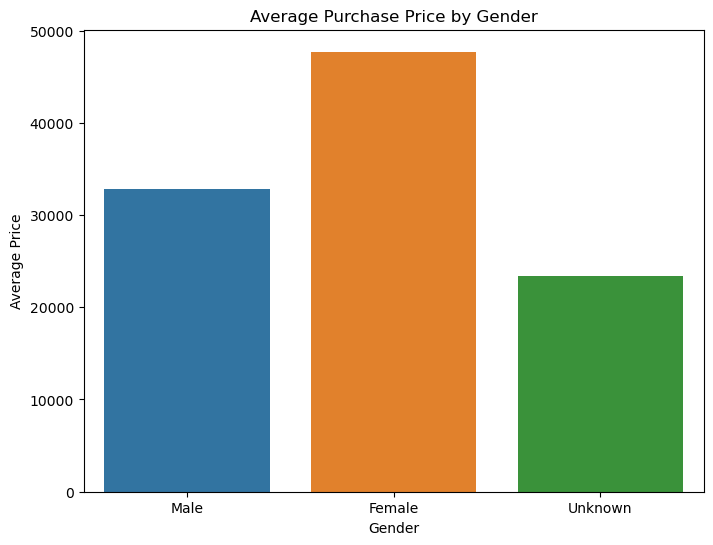

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Price', data=automobile, ci=None)
plt.xlabel('Gender')
plt.ylabel('Average Price')
plt.title('Average Purchase Price by Gender')
plt.show()

#### Question 5 : How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [25]:
loan_data = automobile[automobile['Personal_loan'] == 'Yes']
loan_data['Price'].sum() 

27290000

It first filters the dataset to create a subset, 'loan_data,' containing only those individuals who have indicated 'Yes' for having a personal loan. Then, it calculates the sum of the 'Price' column within this subset, which represents the total amount spent on car purchases by these individuals.

The total amount spent by individuals with personal loans is Rs. 2,72,90,000. 

#### Question 6 : How does having a working partner influence the purchase of higher-priced cars?

Average price of cars purchased by individuals with working partners: 35267.28
Average price of cars purchased by individuals without working partners: 36000.00


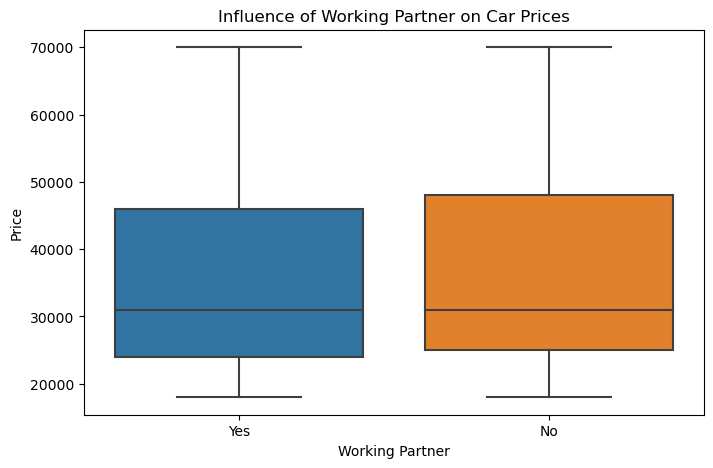

In [60]:

with_partner_data = automobile[automobile['Partner_working'] == 'Yes']
without_partner_data = automobile[automobile['Partner_working'] == 'No']


average_price_with_partner = with_partner_data['Price'].mean()
average_price_without_partner = without_partner_data['Price'].mean()

print(f"Average price of cars purchased by individuals with working partners: {average_price_with_partner:.2f}")
print(f"Average price of cars purchased by individuals without working partners: {average_price_without_partner:.2f}")

plt.figure(figsize=(8, 5))
sns.boxplot(x='Partner_working', y='Price', data=automobile)
plt.title('Influence of Working Partner on Car Prices')
plt.xlabel('Working Partner')
plt.ylabel('Price')
plt.show()

From the boxplot individuals with working partners tend to purchase cars with a slightly lower average price compared to those without working partners. While the difference is relatively small, it implies that having a working partner maynot influence individuals to make more price conscious choices when buying cars.

### Problem 2

In [62]:
bank = pd.read_excel('C:/Users/Nitheesh/Downloads/python/godigt_cc_data.xlsx')
bank.head() 

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [64]:
bank.shape

(8448, 28)

In [65]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [66]:
bank.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [67]:
bank.describe(include='all')

C:\Users\Nitheesh\AppData\Local\Temp\ipykernel_884\2842734812.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bank.describe(include='all')


,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
count,8448.00000,8448,8448.000000,8448,8448,8448,8448,8448.000000,8448.000000,8448.000000,...,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8410,8448.000000,8448,8448.000000
unique,NaN,11,NaN,3,15,5186,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,6,NaN
top,NaN,4262 41XX XXXX XXXX,NaN,Visa,rewards,2008-12-04 00:00:00,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,Salaried,NaN
freq,NaN,2084,NaN,7279,1502,6,1740,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7115,NaN,3918,NaN
first,NaN,NaN,NaN,NaN,NaN,1998-07-24 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-06-17 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4224.50000,NaN,436747.044508,NaN,NaN,NaN,NaN,0.292377,0.494792,0.642045,...,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,NaN,49527.365530,NaN,251706.912879
std,2438.87187,NaN,30489.752417,NaN,NaN,NaN,NaN,0.454881,0.500002,0.479427,...,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,NaN,46244.954836,NaN,229114.856385
min,1.00000,NaN,376916.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,2112.75000,NaN,426241.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,17110.000000,NaN,90000.000000
